### 퀴즈

In [90]:
import pandas as pd

### 선형 회귀

In [91]:
df = pd.read_csv('./data/QuizData.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X, y

(array([[118],
        [253],
        [320],
        [ 94],
        [155],
        [188],
        [201],
        [338],
        [186],
        [183],
        [223],
        [392],
        [ 86],
        [112],
        [129],
        [223],
        [288],
        [262],
        [143],
        [179]], dtype=int64),
 array([ 62, 148, 201,  80,  92, 131, 147, 187, 124, 152, 143, 199,  58,
         68,  76, 149, 152, 183,  88, 101], dtype=int64))

In [92]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [93]:
import matplotlib.pyplot as plt

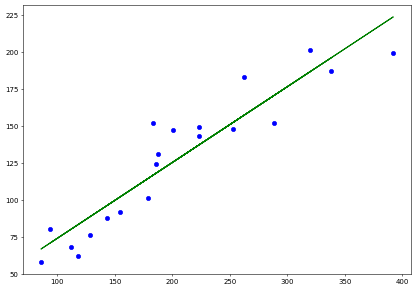

In [94]:
plt.figure(figsize=(10, 7), dpi=50)
plt.scatter(X, y, color='blue')
plt.plot(X, reg.predict(X), color='green')
plt.show()

In [95]:
pred = reg.predict([[300]])
pred

array([176.48430237])

In [96]:
reg.score(X, y)

0.8715517873200844

In [124]:
df = pd.read_csv('./data/QuizData.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [125]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [126]:
import numpy as np
X_arange = np.arange(min(X), max(X), 0.1)
X_arange = X_arange.reshape(-1, 1)

C:\Users\PC\AppData\Local\Temp\ipykernel_18380\3126911001.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_arange = np.arange(min(X), max(X), 0.1)


In [127]:
X_poly = poly.fit_transform(X)
X_poly

array([[1.00000e+00, 1.18000e+02, 1.39240e+04],
       [1.00000e+00, 2.53000e+02, 6.40090e+04],
       [1.00000e+00, 3.20000e+02, 1.02400e+05],
       [1.00000e+00, 9.40000e+01, 8.83600e+03],
       [1.00000e+00, 1.55000e+02, 2.40250e+04],
       [1.00000e+00, 1.88000e+02, 3.53440e+04],
       [1.00000e+00, 2.01000e+02, 4.04010e+04],
       [1.00000e+00, 3.38000e+02, 1.14244e+05],
       [1.00000e+00, 1.86000e+02, 3.45960e+04],
       [1.00000e+00, 1.83000e+02, 3.34890e+04],
       [1.00000e+00, 2.23000e+02, 4.97290e+04],
       [1.00000e+00, 3.92000e+02, 1.53664e+05],
       [1.00000e+00, 8.60000e+01, 7.39600e+03],
       [1.00000e+00, 1.12000e+02, 1.25440e+04],
       [1.00000e+00, 1.29000e+02, 1.66410e+04],
       [1.00000e+00, 2.23000e+02, 4.97290e+04],
       [1.00000e+00, 2.88000e+02, 8.29440e+04],
       [1.00000e+00, 2.62000e+02, 6.86440e+04],
       [1.00000e+00, 1.43000e+02, 2.04490e+04],
       [1.00000e+00, 1.79000e+02, 3.20410e+04]])

In [128]:
reg = LinearRegression()
reg.fit(X_poly, y)

LinearRegression()

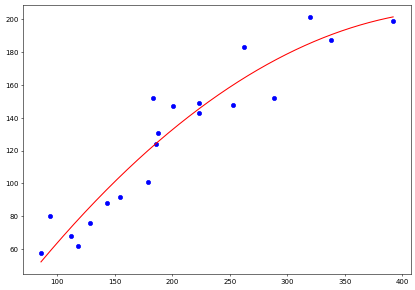

In [133]:
plt.figure(figsize=(10, 7), dpi=50)
plt.scatter(X, y, color='blue')
plt.plot(X_arange, reg.predict(poly.fit_transform(X_arange)), color='red')
plt.show()

In [134]:
reg.score(X_poly, y)

0.9066701298595614

In [135]:
reg.predict(poly.fit_transform([[300]]))

array([178.86907717])

### K평균

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [240]:
df = pd.read_csv('./data/KMeansData.csv')
X = df.iloc[:, :].values

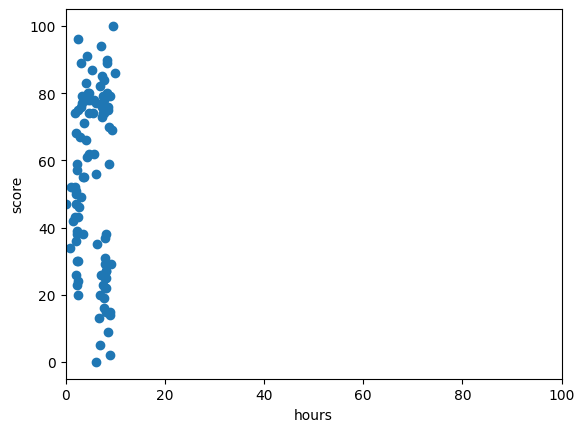

In [241]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('hours')
plt.ylabel('score')
plt.xlim(0, 100)
plt.show()

In [242]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

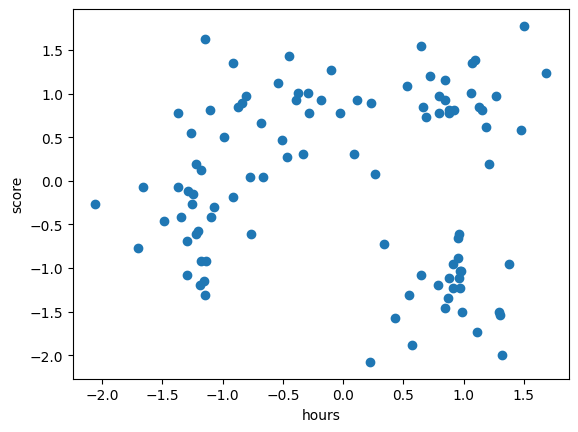

In [243]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

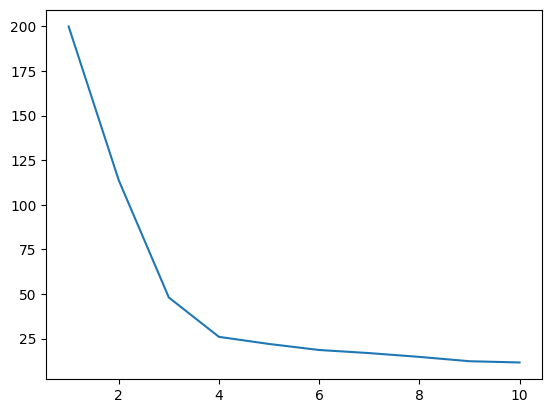

In [244]:
from sklearn.cluster import KMeans
center_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10)
    kmeans.fit(X)
    center_list.append(kmeans.inertia_)
    
plt.plot(range(1, 11), center_list)
plt.show()

In [245]:
K = 4
kmeans = KMeans(n_clusters=K, random_state=0, n_init=10)
group = kmeans.fit_predict(X)
group

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3])

In [246]:
centers = kmeans.cluster_centers_
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

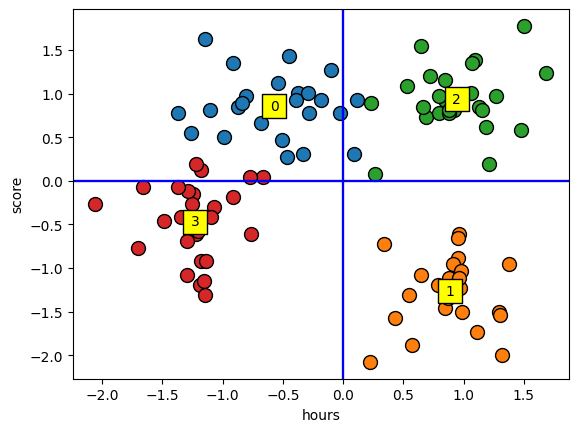

In [247]:
for cluster in range(4):
    plt.scatter(X[group==cluster, 0], X[group==cluster, 1], s=100, ec='black')
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s=300, ec='black', color='yellow', marker='s')
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va='center', ha='center')
    plt.axvline(x=0, ymin=0, ymax=1, color='blue', linestyle='solid')
    plt.axhline(y=0, xmin=0, xmax=1, color='blue', linestyle='solid')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [248]:
X_org = sc.inverse_transform(X)
X_org
centers_org = sc.inverse_transform(centers)

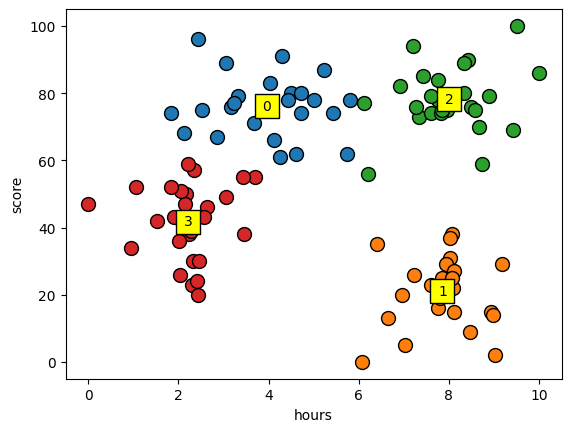

In [249]:
for cluster in range(4):
    plt.scatter(X_org[group==cluster, 0], X_org[group==cluster, 1], s=100, ec='black')
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s=300, ec='black', color='yellow', marker='s')
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va='center', ha='center')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

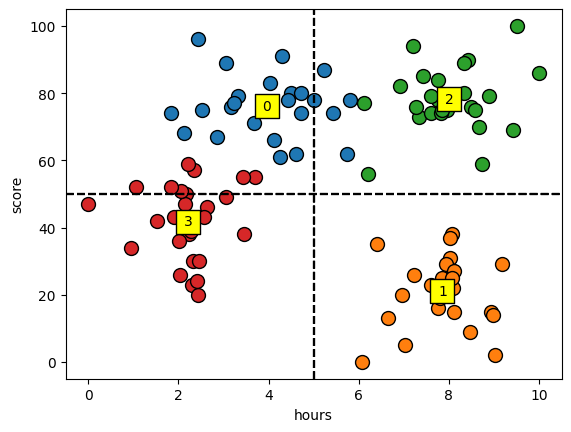

In [270]:
for cluster in range(4):
    plt.scatter(X_org[group==cluster, 0], X_org[group==cluster, 1], s=100, ec='black')
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s=300, ec='black', color='yellow', marker='s')
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va='center', ha='center')
    plt.axvline(x=5, ymin=0, ymax=1, color='black', linestyle='dashed')
    plt.axhline(y=50, xmin=0, xmax=1, color='black', linestyle='dashed')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [281]:
import pandas as pd
df = pd.read_csv('./data/tmdb_5000_movies.csv')

In [284]:
df.shape

(4803, 20)